In [6]:
#checked!!

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter


In [12]:
real_order = [124, 116, 118, 123, 115, 117, 125, 51, 59, 111, 32, 102, 
              108, 42, 62, 37, 99, 44, 103, 48, 26, 96, 31, 106, 95, 
              45, 105, 38, 41, 107, 119, 97, 33, 43, 30, 94, 13, 79, 
              15, 83, 80, 27, 29, 12, 88, 76, 11, 78, 4, 17, 81, 75, 
              19, 74, 14, 6, 67, 68, 1, 10, 65, 5, 64, 63, 0, 66, 69, 
              71, 70, 2, 73, 8, 7, 84, 3, 72, 91, 77, 85, 20, 82, 21,
              24, 9, 18, 28, 104, 22, 110, 87, 25, 86, 89, 92, 35, 90,
              40, 36, 100, 50, 47, 16, 93, 39, 23, 98, 34, 56, 114, 57, 
              101, 113, 54, 46, 52, 49, 60, 55, 120, 53, 58, 109, 112, 61, 122, 121]


races2 = ['White alone',
       'Black or African American alone',
       'American Indian and Alaska Native alone',
       'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some Other Race alone',
       'White; Black or African American',
       'White; American Indian and Alaska Native',
       'White; Asian',
       'White; Native Hawaiian and Other Pacific Islander',
       'White; Some Other Race',
       'Black or African American; American Indian and Alaska Native',
       'Black or African American; Asian',
       'Black or African American; Native Hawaiian and Other Pacific Islander',
       'Black or African American; Some Other Race',
       'American Indian and Alaska Native; Asian',
       'American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
       'American Indian and Alaska Native; Some Other Race',
       'Asian; Native Hawaiian and Other Pacific Islander',
       'Asian; Some Other Race',
       'Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; Black or African American; American Indian and Alaska Native',
       'White; Black or African American; Asian',
       'White; Black or African American; Native Hawaiian and Other Pacific Islander',
       'White; Black or African American; Some Other Race',
       'White; American Indian and Alaska Native; Asian',
       'White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
       'White; American Indian and Alaska Native; Some Other Race',
       'White; Asian; Native Hawaiian and Other Pacific Islander',
       'White; Asian; Some Other Race',
       'White; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'Black or African American; American Indian and Alaska Native; Asian',
       'Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
       'Black or African American; American Indian and Alaska Native; Some Other Race',
       'Black or African American; Asian; Native Hawaiian and Other Pacific Islander',
       'Black or African American; Asian; Some Other Race',
       'Black or African American; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
       'American Indian and Alaska Native; Asian; Some Other Race',
       'American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; Black or African American; American Indian and Alaska Native; Asian',
       'White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
       'White; Black or African American; American Indian and Alaska Native; Some Other Race',
       'White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander',
       'White; Black or African American; Asian; Some Other Race',
       'White; Black or African American; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
       'White; American Indian and Alaska Native; Asian; Some Other Race',
       'White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
       'Black or African American; American Indian and Alaska Native; Asian; Some Other Race',
       'Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
       'White; Black or African American; American Indian and Alaska Native; Asian; Some Other Race',
       'White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
       'White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race']

races = ['Total!!Population of one race!!White alone',
           'Total!!Population of one race!!Black or African American alone',
           'Total!!Population of one race!!American Indian and Alaska Native alone',
           'Total!!Population of one race!!Asian alone',
           'Total!!Population of one race!!Native Hawaiian and Other Pacific Islander alone',
           'Total!!Population of one race!!Some Other Race alone',
           'Total!!Two or More Races!!Population of two races!!White; Black or African American',
           'Total!!Two or More Races!!Population of two races!!White; American Indian and Alaska Native',
           'Total!!Two or More Races!!Population of two races!!White; Asian',
           'Total!!Two or More Races!!Population of two races!!White; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of two races!!White; Some Other Race',
           'Total!!Two or More Races!!Population of two races!!Black or African American; American Indian and Alaska Native',
           'Total!!Two or More Races!!Population of two races!!Black or African American; Asian',
           'Total!!Two or More Races!!Population of two races!!Black or African American; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of two races!!Black or African American; Some Other Race',
           'Total!!Two or More Races!!Population of two races!!American Indian and Alaska Native; Asian',
           'Total!!Two or More Races!!Population of two races!!American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of two races!!American Indian and Alaska Native; Some Other Race',
           'Total!!Two or More Races!!Population of two races!!Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of two races!!Asian; Some Other Race',
           'Total!!Two or More Races!!Population of two races!!Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!White; Black or African American; American Indian and Alaska Native',
           'Total!!Two or More Races!!Population of three races!!White; Black or African American; Asian',
           'Total!!Two or More Races!!Population of three races!!White; Black or African American; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!White; Black or African American; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!White; American Indian and Alaska Native; Asian',
           'Total!!Two or More Races!!Population of three races!!White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!White; American Indian and Alaska Native; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!White; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!White; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!White; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!Black or African American; American Indian and Alaska Native; Asian',
           'Total!!Two or More Races!!Population of three races!!Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!Black or African American; American Indian and Alaska Native; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!Black or African American; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!Black or African American; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!Black or African American; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of three races!!American Indian and Alaska Native; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of three races!!Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; American Indian and Alaska Native; Asian',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; American Indian and Alaska Native; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; Black or African American; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of four races!!White; American Indian and Alaska Native; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!White; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of four races!!Black or African American; American Indian and Alaska Native; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of four races!!American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander',
           'Total!!Two or More Races!!Population of five races!!White; Black or African American; American Indian and Alaska Native; Asian; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!White; Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of five races!!Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race',
           'Total!!Two or More Races!!Population of six races!!White; Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race']
            
print(len(real_order))    

126


In [8]:
#find races that are <10% in dataset

def get_minor_swapping(county, file, column):
    df_orig = pd.read_csv (r'../homemade_data/'+county+'.csv')
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed')]
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('SwapVal')]
    for index, row in df_orig.iterrows():
        d = row['race']
        h = row['hispanic']
        if d in races and h==1:
            df_orig.at[index, 'race'] = races.index(d)
        elif d in races and h==0:
            df_orig.at[index, 'race'] = races.index(d)+63
    labels_all = []
    vals_all = []

    #get list of occurrences by race - orig
    for key1, value1 in df_orig.iteritems():
        if(key1 == column):
            labs, vals = zip(*Counter(value1).items())
            labs = list(labs)
            vals = list(vals)
            for i in range(0, len(real_order)):
                if i not in labs:
                    labels_all.append(i)
                    vals_all.append(0)
                elif i in labs:
                    pos = labs.index(i)
                    labels_all.append(i)
                    vals_all.append(vals[pos])   
    labels_all = np.arange(0,len(real_order),1)

    
    #get list of occurences by race - swapping
    df2 = pd.read_csv(file)
    for index, row in df2.iterrows():
        d = row['race']
        h = row['hispanic']
        if h==0:
            df2.at[index, 'race'] = d+63
    labels2_all = []
    vals2_all = []
    
    for key, value in df2.iteritems():
        if(key == column):
            labels2, values2 = zip(*Counter(value).items())
            labels2=list(labels2)
            values2 = list(values2)
            for i in range(0, len(real_order)):
                if i not in labels2:
                    labels2_all.append(i)
                    vals2_all.append(0)
                elif i in labels2:
                    pos = labels2.index(i)
                    labels2_all.append(i)
                    vals2_all.append(values2[pos])
    labels2_all = np.arange(0,len(real_order),1)
    
    
    #get percent race occurrences of each race in original data (only calculate for minorites >5%)
    total = 0
    for e in range(0, len(vals_all)):
        total = total + vals_all[e]
    final = []
    for i in range(0,len(vals_all)):
        if vals_all[i]/total <= 0.025:
            final.append(i)
            
    summy = 0
    for f in final:
        summy += vals_all[f]
    
    #find mean difference for all minority groups
    differences = []
    for idx in final:
        if (vals2_all[idx]-vals_all[idx]) < 0:
            differences.append(abs((vals2_all[idx]-vals_all[idx]))/(vals_all[idx]+1))
    differences.sort()
    
    if(len(differences)>0):
        mean = sum(differences)/len(differences)
    else:
        mean = 0
        

    return mean
            
  

In [9]:
def similar_mean_dif(county):
    dfinal = pd.DataFrame(columns=['filename', 'mean_difference'])

    for filename in os.listdir('../swapping/swap_runs3/'+county+'/similar/'):
            if filename.endswith(".csv"):
                meandif = get_minor_swapping(county, '../swapping/swap_runs3/'+county+'/similar/'+filename, 'race')
                
                dfinal = dfinal.append({'filename': filename, 'mean_difference': meandif}, ignore_index=True)
                
    swaprates = np.arange(.01, 1, .05, float)
    
    sorted = {}
    for s in swaprates:
        #meandif, count
        sorted[s] = []
   
    for column_name, data in dfinal.iterrows():
        f = data[0].rfind('_')
        swap = data[0][0:f]
        swap = swap[5:]
        
        for s in swaprates:
            spos = str(s)[0:f]
            if swap == spos:           
                sorted[s].append(data[1])
                break
    
    for s in swaprates:
        sorted[s] = sum(sorted[s])/len(sorted[s])
                
    final = pd.DataFrame(columns=['filename', 'mean_difference'])
    for s in sorted:
        final = final.append({'filename': s, 'mean_difference': sorted[s]}, ignore_index=True)
                
        
    
    fa = "mean_dif/"+county+"/similar/swapping_final4.csv"
    csv_orig_data = final.to_csv(fa, index = True)

    
counties = ['Alameda', 'Armstrong', 'Cibola', 'Fayette', 'GrandForks', 'Hawaii', 'Jefferson', 'Nantucket', 'Washington']
for county in counties:
    print(county)
    similar_mean_dif(county)

Alameda
Armstrong
Cibola
Fayette
GrandForks
Hawaii
Jefferson
Nantucket
Washington


In [10]:
def get_minor_dp(county, file, column):
    df_orig = pd.read_csv (r'../homemade_data/'+county+'.csv')
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed')]
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('SwapVal')]
    for index, row in df_orig.iterrows():    
        h = row['hispanic']
        d = row['race']
        if d in races and h==1:
            df_orig.at[index, 'race'] = races.index(d)
        elif d in races and h==0:
            df_orig.at[index, 'race'] = races.index(d)+63
    labels_all = []
    vals_all = []

    #get list of occurrences by race - orig
    for key1, value1 in df_orig.iteritems():
        if(key1 == column):
            labs, vals = zip(*Counter(value1).items())
            labs = list(labs)
            vals = list(vals)
            for i in range(0, len(real_order)):
                if i not in labs:
                    labels_all.append(i)
                    vals_all.append(0)
                elif i in labs:
                    pos = labs.index(i)
                    labels_all.append(i)
                    vals_all.append(vals[pos])
    labels_all = np.arange(0,len(real_order),1)

    #get list of occurences by race - swapping
    df2 = pd.read_csv(file)
    for index, row in df2.iterrows():
        h = row['hispanic']
        d = row['race']
        if h==0:
            df2.at[index, 'race'] = d+63
        else:
            df2.at[index, 'race'] = d
    labels2_all = []
    vals2_all = []
    
  
    
    plt.xticks(x, indexes_all, rotation='vertical')
    #pop =ax1.bar(2*indexes, values, width=w, color='b', align='center')
    ax1.bar(4*indexes_all, vals_all, width=w, color='b', align='center', label="Original Dataset")
    ax1.bar(4*indexes2_all+1, vals2_all, width=w, color='orange', align='center', label='DP .1')
    ax1.legend()
    
    
    #get percent race occurrences of each race in original data (only calculate for minorites >5%)
    total = 0
    for e in range(0, len(vals_all)):
        total = total + vals_all[e]
    final = []
    for i in range(0,len(vals_all)):
        if vals_all[i]/total <= 0.025:
            final.append(i)
            
    summy = 0
    for f in final:
        summy += vals_all[f]
    
    #find mean difference for all minority groups
    differences = []
    for idx in final:
        if (vals2_all[idx]-vals_all[idx]) < 0:
            differences.append(abs((vals2_all[idx]-vals_all[idx]))/(vals_all[idx]+1))
    differences.sort()
    
    if(len(differences)>0):
        mean = sum(differences)/len(differences)
    else:
        mean = 0
        

    return mean
            

In [11]:
def dp_mean_dif(county):
    
    ep = np.arange(.01, 10, .5, float)
    
    epsilon = []
    
    for ee in ep:
        ee = str(round(ee,1))
        if ee[len(ee)-1] == '.':
            ee = str(e)+'0'
        epsilon.append(ee)

    
    dfinal = pd.DataFrame(columns=['filename', 'mean_difference'])

    for filename in os.listdir('../dp/dp_runs2/'+county+'/'):
            if filename.endswith(".csv"):
                meandif = get_minor_dp(county, '../dp/dp_runs2/'+county+'/'+filename, 'race')
                
                dfinal = dfinal.append({'filename': filename, 'mean_difference': meandif}, ignore_index=True)
                
    
       
    sorted = {}
    for e in epsilon:
        #meandif, count
        sorted[e] = []

    for column_name, data in dfinal.iterrows():
        f = data[0].rfind('_')
        swap = data[0][0:f]
        swap = swap[6:]
        
        
        for e in epsilon:
            if swap[:3] == e[:3]: 
                sorted[e].append(data[1])
                break
    
    for e in epsilon:
        sorted[e] = sum(sorted[e])/len(sorted[e])
                
    final = pd.DataFrame(columns=['filename', 'mean_difference'])
    for e in sorted:
        final = final.append({'filename': e, 'mean_difference': sorted[e]}, ignore_index=True)
                

    fa = "mean_dif/"+county+"/dp/dp4.csv"
    csv_orig_data = final.to_csv(fa, index = True)

    
counties = ['Alameda', 'Armstrong', 'Cibola', 'Fayette', 'GrandForks', 'Hawaii', 'Jefferson', 'Nantucket', 'Washington']
for county in counties:
    print(county)
    dp_mean_dif(county)

Alameda
Armstrong
Cibola
Fayette
GrandForks
Hawaii
Jefferson
Nantucket
Washington


In [74]:
def graph(county, file):        
    
    df_orig = pd.read_csv (r'../homemade_data/'+county+'.csv')
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('^Unnamed')]
    df_orig = df_orig.loc[:, ~df_orig.columns.str.contains('SwapVal')]
    for index, row in df_orig.iterrows():
        d = row['race']
        h = row['hispanic']
        if d in races and h==1:
            df_orig.at[index, 'race'] = races.index(d)
        elif d in races and h==0:
            df_orig.at[index, 'race'] = races.index(d)+63
    labels_all = []
    vals_all = []

    #get list of occurrences by race - orig
    for key1, value1 in df_orig.iteritems():
        if(key1 == 'race'):
            labs, vals = zip(*Counter(value1).items())
            labs = list(labs)
            vals = list(vals)
            for i in range(0, len(real_order)):
                if i not in labs:
                    labels_all.append(i)
                    vals_all.append(0)
                elif i in labs:
                    pos = labs.index(i)
                    labels_all.append(i)
                    vals_all.append(vals[pos])   
    labels_all = np.arange(0,len(real_order),1)

    
    #get list of occurences by race - swapping
    df2 = pd.read_csv(file)
    for index, row in df2.iterrows():
        d = row['race']
        h = row['hispanic']
        if h==0:
            df2.at[index, 'race'] = d+63
    labels2_all = []
    vals2_all = []
    
    for key, value in df2.iteritems():
        if(key == 'race'):
            labels2, values2 = zip(*Counter(value).items())
            labels2=list(labels2)
            values2 = list(values2)
            for i in range(0, len(real_order)):
                if i not in labels2:
                    labels2_all.append(i)
                    vals2_all.append(0)
                elif i in labels2:
                    pos = labels2.index(i)
                    labels2_all.append(i)
                    vals2_all.append(values2[pos])
    labels2_all = np.arange(0,len(real_order),1)    
    
    
    f = plt.figure()
    f.set_figwidth(25)
    x = np.arange(126)*4
    ax1 = plt.subplot(1,1,1) 
    w = 1.25

    #plt.xticks(x, labels_all, rotation='vertical')
    #pop =ax1.bar(2*indexes, values, width=w, color='b', align='center')
    ax1.bar(4*(labels_all)+2, vals_all, width=w, color='b', align='center', label="Original Dataset")
    ax1.bar(4*labels_all, vals2_all, width=w, color='orange', align='center', label='DP 10')
    ax1.legend()
    #ax1.set_yscale("log")
    print(vals_all)
    print(vals2_all)



[194, 7, 10, 1, 0, 42, 4, 4, 8, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 687, 257, 4, 114, 0, 1, 11, 11, 20, 1, 6, 4, 7, 0, 0, 1, 0, 1, 1, 3, 0, 8, 4, 0, 1, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[234, 1, 9, 2, 1, 83, 6, 15, 14, 1, 2, 0, 3, 1, 3, 2, 0, 1, 1, 6, 1, 7, 0, 0, 0, 6, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 710, 201, 1, 105, 2, 1, 0, 1, 7, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


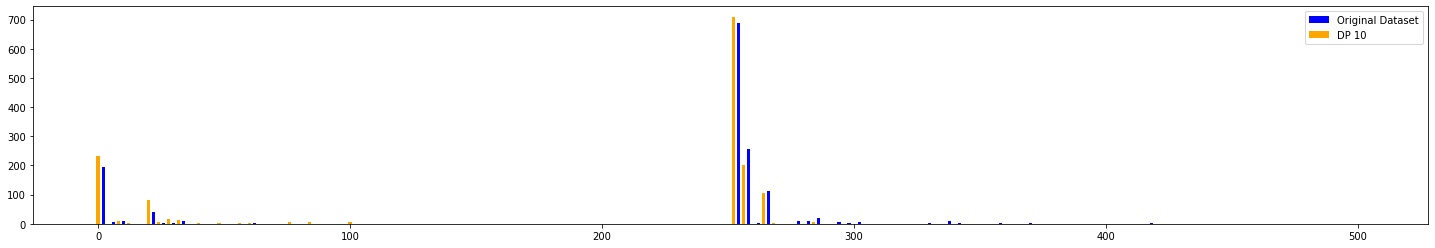

In [75]:
graph('alameda', '../swapping/swap_runs3/alameda/similar/swap_0.41000000000000003_a1.csv')